In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('2011-16 Stats Only Bust.xlsx')
df

,Player,Age,SOS,FG,FGA,FG%,2P,2PA,2P%,3P,...,BLK%,TOV%,AST:TOV,Hght\n(inches),Weight,RSCI Rank,Max Measured Wingspan (inches),Avg Measured Wingspan (inches,Difference,Bust
0,Kyrie Irving,19.096,8.31,7.3,13.7,0.529,4.9,8.6,0.569,2.4,...,1.8,16.4,1.722222,75,193,3.0,76.00,75.67,1.00,0
1,Brandon Knight,19.208,8.91,6.4,15.1,0.423,3.8,8.3,0.461,2.6,...,0.6,16.8,1.342857,75,195,5.0,78.75,78.38,3.75,0
2,Kemba Walker,21.051,10.44,8.2,19.2,0.428,6.2,13.3,0.471,1.9,...,0.5,9.5,2.000000,73,184,16.0,75.50,74.50,2.50,0
3,Jimmer Fredette,22.123,5.76,10.5,23.1,0.452,6.7,13.7,0.491,3.7,...,0.1,12.7,1.200000,74,195,NaN,77.00,76.75,3.00,1
4,Nolan Smith,22.338,8.31,8.3,18.0,0.458,6.4,12.9,0.501,1.8,...,0.2,14.8,1.621622,74,190,19.0,78.00,77.88,4.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,Jahlil Okafor,19.197,9.87,9.8,14.7,0.664,9.8,14.7,0.664,0.0,...,4.5,15.6,0.515152,83,260,2.0,90.25,89.06,7.25,0
231,Jakob Poeltl,20.257,8.79,8.3,12.9,0.646,8.3,12.9,0.646,0.0,...,5.0,13.7,0.962963,84,248,NaN,86.75,85.88,2.75,0
232,Chinanu Onuaku,19.239,7.74,7.2,11.6,0.620,7.2,11.5,0.623,0.0,...,9.6,20.8,0.794118,82,245,63.0,86.75,86.63,4.75,1
233,Diamond Stone,19.138,8.31,8.3,14.6,0.568,8.3,14.6,0.568,0.0,...,7.1,12.9,0.269231,83,255,6.0,88.00,86.89,5.00,1


In [3]:
import dabl

In [4]:
df['RSCI Rank'] = pd.to_numeric(df['RSCI Rank'], errors='coerce')
df['RSCI Rank'] = df['RSCI Rank'].fillna(df['RSCI Rank'].mean())

Target looks like classification
Showing only top 10 of 42 continuous features


/opt/anaconda3/lib/python3.7/site-packages/dabl/plot/utils.py:621: UserWarning: Dropped 1 outliers in column Age.
  int(dropped), series.name), UserWarning)


Linear Discriminant Analysis training set score: 0.701


/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


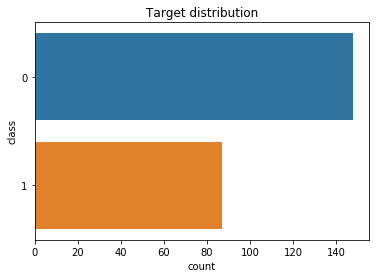

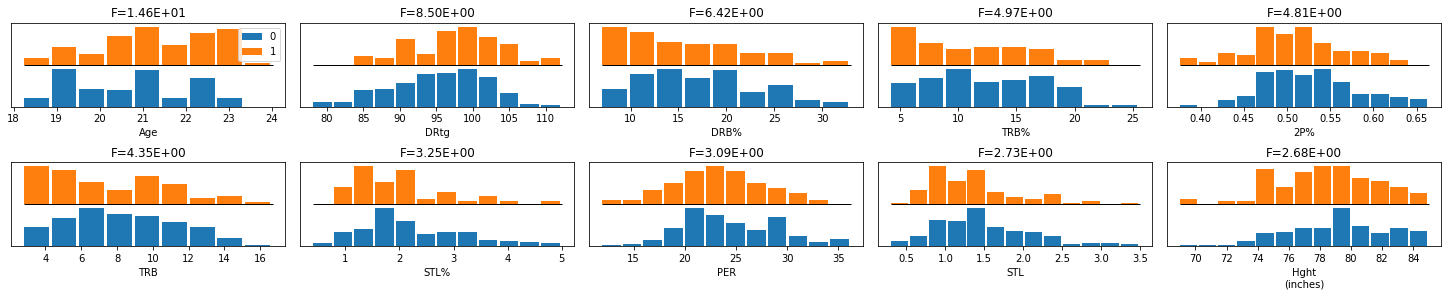

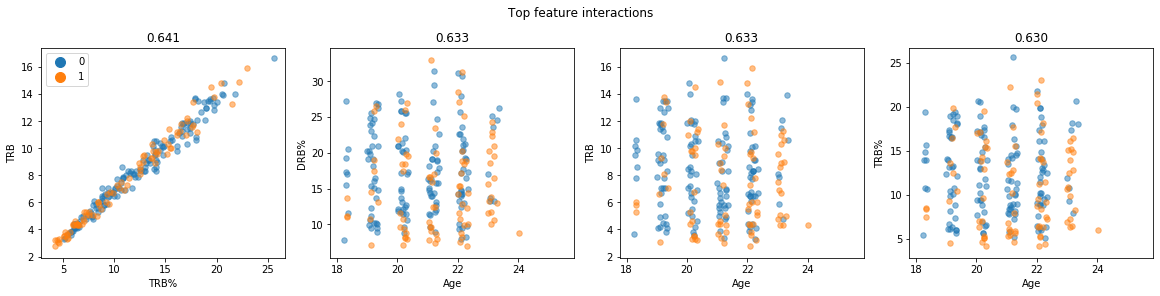

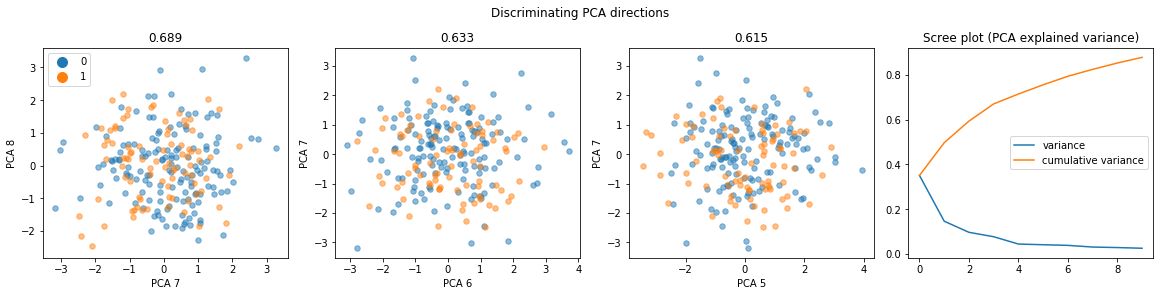

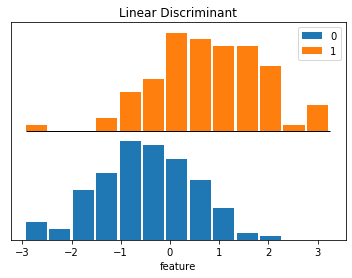

In [5]:
dabl.plot(df, target_col="Bust")

In [6]:
sc = dabl.SimpleClassifier()
sc.fit(df, target_col='Bust')

Running DummyClassifier(strategy='prior')
accuracy: 0.630 average_precision: 0.370 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.386
=== new best DummyClassifier(strategy='prior') (using recall_macro):
accuracy: 0.630 average_precision: 0.370 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.386

Running GaussianNB()
accuracy: 0.431 average_precision: 0.425 roc_auc: 0.505 recall_macro: 0.472 f1_macro: 0.380
Running MultinomialNB()
accuracy: 0.575 average_precision: 0.421 roc_auc: 0.505 recall_macro: 0.485 f1_macro: 0.450
Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.519 average_precision: 0.373 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.451
Running DecisionTreeClassifier(class_weight='balanced', max_depth=5)
accuracy: 0.633 average_precision: 0.451 roc_auc: 0.567 recall_macro: 0.586 f1_macro: 0.583
=== new best DecisionTreeClassifier(class_weight='balanced', max_depth=5) (using recall_macro):
accuracy: 0.633 average_precision: 0.451 roc_auc: 0.567 r

SimpleClassifier(random_state=None, refit=True, shuffle=True, type_hints=None,
                 verbose=1)

In [7]:
X = df.drop(['Bust', 'Player'], axis=1)
y = df['Bust']

In [8]:
from xverse.transformer import MonotonicBinning

clf = MonotonicBinning()
clf.fit(X, y)

MonotonicBinning(cardinality_cutoff=5, custom_binning=None, feature_names='all',
                 force_bins=4, max_bins=20, prefix=None)

In [9]:
clf.bins

{'Age': array([18.242, 20.176, 22.024, 27.148]),
 'SOS': array([-5.39,  7.17,  8.31, 12.13]),
 'FG': array([ 3.5,  6.3,  7.4, 11.2]),
 'FGA': array([ 7.6, 12.9, 15.5, 23.1]),
 'FG%': array([0.369, 0.453, 0.5  , 0.664]),
 '2P': array([ 2.2,  4.7,  6.1, 10.2]),
 '2PA': array([ 4. ,  9.1, 11.5, 17.3]),
 '2P%': array([0.376, 0.497, 0.541, 0.664]),
 '3P': array([0. , 0.8, 2. , 4.6]),
 '3PA': array([ 0. ,  2.2,  5.4, 11.2]),
 '3P%': array([0.   , 0.304, 0.377, 0.6  ]),
 'FT': array([1.1, 3.8, 5. , 8.7]),
 'FTA': array([ 1.9,  5.1,  6.8, 11.6]),
 'FT%': array([0.295, 0.706, 0.783, 0.925]),
 'TRB': array([ 2.8,  6.1,  9.6, 16.7]),
 'AST': array([ 0.2,  1.9,  3.4, 11.8]),
 'STL': array([0.3, 1.1, 1.6, 3.5]),
 'BLK': array([0. , 0.5, 1.2, 5.8]),
 'TOV': array([1. , 2.3, 3. , 5. ]),
 'PF': array([1.4, 2.5, 3.2, 7.6]),
 'PTS': array([ 9.9, 17.8, 21.1, 32.3]),
 'ORtg': array([ 95.5, 113.4, 119.2, 139. ]),
 'DRtg': array([ 78.1,  93.1,  99.6, 112.2]),
 'PER': array([11.9, 21.9, 25.9, 36.2]),
 'TS%':

In [10]:
output_bins = clf.bins #will be used later in this exercise

In [11]:
out_X = clf.transform(X)

In [12]:
out_X.head()

,Age,SOS,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,STL%,BLK%,TOV%,AST:TOV,Hght\n(inches),Weight,RSCI Rank,Max Measured Wingspan (inches),Avg Measured Wingspan (inches,Difference
0,"(18.241, 20.176]","(7.17, 8.31]","(6.3, 7.4]","(12.9, 15.5]","(0.5, 0.664]","(4.7, 6.1]","(3.999, 9.1]","(0.541, 0.664]","(2.0, 4.6]","(2.2, 5.4]",...,"(2.3, 5.0]","(1.4, 3.4]","(14.7, 27.8]","(1.375, 3.619]","(68.999, 78.0]","(159.999, 205.0]","(0.999, 24.0]","(70.999, 81.25]","(70.87899999999999, 80.58]","(-2.251, 3.0]"
1,"(18.241, 20.176]","(8.31, 12.13]","(6.3, 7.4]","(12.9, 15.5]","(0.368, 0.453]","(2.1990000000000003, 4.7]","(3.999, 9.1]","(0.375, 0.497]","(2.0, 4.6]","(5.4, 11.2]",...,"(0.399, 1.7]","(0.099, 1.4]","(14.7, 27.8]","(0.794, 1.375]","(68.999, 78.0]","(159.999, 205.0]","(0.999, 24.0]","(70.999, 81.25]","(70.87899999999999, 80.58]","(3.0, 4.5]"
2,"(20.176, 22.024]","(8.31, 12.13]","(7.4, 11.2]","(15.5, 23.1]","(0.368, 0.453]","(6.1, 10.2]","(11.5, 17.3]","(0.375, 0.497]","(0.8, 2.0]","(5.4, 11.2]",...,"(2.3, 5.0]","(0.099, 1.4]","(5.699, 12.0]","(1.375, 3.619]","(68.999, 78.0]","(159.999, 205.0]","(0.999, 24.0]","(70.999, 81.25]","(70.87899999999999, 80.58]","(-2.251, 3.0]"
3,"(22.024, 27.148]","(-5.391, 7.17]","(7.4, 11.2]","(15.5, 23.1]","(0.368, 0.453]","(6.1, 10.2]","(11.5, 17.3]","(0.375, 0.497]","(2.0, 4.6]","(5.4, 11.2]",...,"(1.7, 2.3]","(0.099, 1.4]","(12.0, 14.7]","(0.794, 1.375]","(68.999, 78.0]","(159.999, 205.0]","(24.0, 45.597]","(70.999, 81.25]","(70.87899999999999, 80.58]","(-2.251, 3.0]"
4,"(22.024, 27.148]","(7.17, 8.31]","(7.4, 11.2]","(15.5, 23.1]","(0.453, 0.5]","(6.1, 10.2]","(11.5, 17.3]","(0.497, 0.541]","(0.8, 2.0]","(2.2, 5.4]",...,"(1.7, 2.3]","(0.099, 1.4]","(14.7, 27.8]","(1.375, 3.619]","(68.999, 78.0]","(159.999, 205.0]","(0.999, 24.0]","(70.999, 81.25]","(70.87899999999999, 80.58]","(3.0, 4.5]"


In [13]:
from xverse.transformer import WOE

clf = WOE()
clf.fit(X, y)

WOE(exclude_features=None, feature_names='all', mono_cardinality_cutoff=5,
    mono_custom_binning={'2P': array([ 2.2,  4.7,  6.1, 10.2]),
                         '2P%': array([0.376, 0.497, 0.541, 0.664]),
                         '2PA': array([ 4. ,  9.1, 11.5, 17.3]),
                         '3P': array([0. , 0.8, 2. , 4.6]),
                         '3P%': array([0.   , 0.304, 0.377, 0.6  ]),
                         '3PA': array([ 0. ,  2.2,  5.4, 11.2]),
                         '3PAr': array([0.   , 0.178, 0.362, 0.666]),
                         'AST': array([ 0.2,  1.9,  3.4,...
              'PER': {Interval(11.899000000000001, 21.9, closed='right'): 0.033465726870351896,
                      Interval(21.9, 25.9, closed='right'): 0.18110172567641641,
                      Interval(25.9, 36.2, closed='right'): -0.22011193357438988},
              'PF': {Interval(1.399, 2.5, closed='right'): -0.013423020332140661,
                     Interval(2.5, 3.2, closed='right'): -0.0

In [14]:
clf.woe_df.head(10)

,Variable_Name,Category,Count,Event,Non_Event,Event_Rate,Non_Event_Rate,Event_Distribution,Non_Event_Distribution,WOE,Information_Value
0,2P,"(2.1990000000000003, 4.7]",79,32,47,0.405063,0.594937,0.367816,0.317568,0.146892,0.015893
1,2P,"(4.7, 6.1]",78,26,52,0.333333,0.666667,0.298851,0.351351,-0.161843,0.015893
2,2P,"(6.1, 10.2]",78,29,49,0.371795,0.628205,0.333333,0.331081,0.006780,0.015893
3,2P%,"(0.375, 0.497]",80,35,45,0.437500,0.562500,0.402299,0.304054,0.279990,0.064278
4,2P%,"(0.497, 0.541]",77,29,48,0.376623,0.623377,0.333333,0.324324,0.027399,0.064278
5,2P%,"(0.541, 0.664]",78,23,55,0.294872,0.705128,0.264368,0.371622,-0.340535,0.064278
6,2PA,"(3.999, 9.1]",81,28,53,0.345679,0.654321,0.321839,0.358108,-0.106783,0.014814
7,2PA,"(9.1, 11.5]",78,32,46,0.410256,0.589744,0.367816,0.310811,0.168399,0.014814
8,2PA,"(11.5, 17.3]",76,27,49,0.355263,0.644737,0.310345,0.331081,-0.064679,0.014814
9,3P,"(-0.001, 0.8]",82,32,50,0.390244,0.609756,0.367816,0.337838,0.085017,0.023253


In [15]:
clf.iv_df

,Variable_Name,Information_Value
10,Age,0.213868
37,TRB,0.170763
33,STL,0.161579
14,DRB%,0.158666
26,ORB%,0.140723
23,FTr,0.133697
15,DRtg,0.124035
34,STL%,0.120378
11,Avg Measured Wingspan (inches,0.098820
38,TRB%,0.096325


In [16]:
output_woe_bins = clf.woe_bins #future transformation

In [17]:
output_woe_bins

{'2P': {Interval(2.1990000000000003, 4.7, closed='right'): 0.14689245619919938,
  Interval(4.7, 6.1, closed='right'): -0.16184302545041387,
  Interval(6.1, 10.2, closed='right'): 0.006779686985378769},
 '2P%': {Interval(0.375, 0.497, closed='right'): 0.2799897268286253,
  Interval(0.497, 0.541, closed='right'): 0.027398974188114347,
  Interval(0.541, 0.664, closed='right'): -0.3405348141937898},
 '2PA': {Interval(3.999, 9.1, closed='right'): -0.10678324826738665,
  Interval(9.1, 11.5, closed='right'): 0.16839866142016288,
  Interval(11.5, 17.3, closed='right'): -0.06467927699676612},
 '3P': {Interval(-0.001, 0.8, closed='right'): 0.0850170524811119,
  Interval(0.8, 2.0, closed='right'): -0.22011193357438988,
  Interval(2.0, 4.6, closed='right'): 0.12583904700136697},
 '3P%': {Interval(-0.001, 0.304, closed='right'): -0.35855331969646825,
  Interval(0.304, 0.377, closed='right'): 0.0406812386610602,
  Interval(0.377, 0.6, closed='right'): 0.2964645640321304},
 '3PA': {Interval(-0.001, 2

In [18]:
output_mono_bins = clf.mono_custom_binning  #future transformation

In [19]:
output_mono_bins

{'Age': array([18.242, 20.176, 22.024, 27.148]),
 'SOS': array([-5.39,  7.17,  8.31, 12.13]),
 'FG': array([ 3.5,  6.3,  7.4, 11.2]),
 'FGA': array([ 7.6, 12.9, 15.5, 23.1]),
 'FG%': array([0.369, 0.453, 0.5  , 0.664]),
 '2P': array([ 2.2,  4.7,  6.1, 10.2]),
 '2PA': array([ 4. ,  9.1, 11.5, 17.3]),
 '2P%': array([0.376, 0.497, 0.541, 0.664]),
 '3P': array([0. , 0.8, 2. , 4.6]),
 '3PA': array([ 0. ,  2.2,  5.4, 11.2]),
 '3P%': array([0.   , 0.304, 0.377, 0.6  ]),
 'FT': array([1.1, 3.8, 5. , 8.7]),
 'FTA': array([ 1.9,  5.1,  6.8, 11.6]),
 'FT%': array([0.295, 0.706, 0.783, 0.925]),
 'TRB': array([ 2.8,  6.1,  9.6, 16.7]),
 'AST': array([ 0.2,  1.9,  3.4, 11.8]),
 'STL': array([0.3, 1.1, 1.6, 3.5]),
 'BLK': array([0. , 0.5, 1.2, 5.8]),
 'TOV': array([1. , 2.3, 3. , 5. ]),
 'PF': array([1.4, 2.5, 3.2, 7.6]),
 'PTS': array([ 9.9, 17.8, 21.1, 32.3]),
 'ORtg': array([ 95.5, 113.4, 119.2, 139. ]),
 'DRtg': array([ 78.1,  93.1,  99.6, 112.2]),
 'PER': array([11.9, 21.9, 25.9, 36.2]),
 'TS%':

In [20]:
clf.transform(X).head()

,Age,SOS,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,STL%,BLK%,TOV%,AST:TOV,Hght\n(inches),Weight,RSCI Rank,Max Measured Wingspan (inches),Avg Measured Wingspan (inches,Difference
0,-0.618601,0.094090,-0.257153,-0.064679,-0.279626,-0.161843,-0.106783,-0.340535,0.125839,0.165844,...,-0.449525,-0.438096,0.115144,0.115144,0.265601,0.27999,-0.333693,0.174629,0.251002,-0.095152
1,-0.618601,-0.303494,-0.257153,-0.064679,0.353623,0.146892,-0.106783,0.279990,0.125839,-0.182462,...,0.391542,0.279990,0.115144,-0.322186,0.265601,0.27999,-0.333693,0.174629,0.251002,-0.227801
2,0.006780,-0.303494,0.158629,0.221149,0.353623,0.006780,-0.064679,0.279990,-0.220112,-0.182462,...,-0.449525,0.279990,0.146892,0.115144,0.265601,0.27999,-0.333693,0.174629,0.251002,-0.095152
3,0.531304,0.177664,0.158629,0.221149,0.353623,0.006780,-0.064679,0.279990,0.125839,-0.182462,...,-0.039241,0.279990,-0.279626,-0.322186,0.265601,0.27999,0.243622,0.174629,0.251002,-0.095152
4,0.531304,0.094090,0.158629,0.221149,-0.104685,0.006780,-0.064679,0.027399,-0.220112,0.165844,...,-0.039241,0.279990,0.115144,0.115144,0.265601,0.27999,-0.333693,0.174629,0.251002,-0.227801


In [21]:
from xverse.graph import BarCharts

In [22]:
woe_df = clf.woe_df

In [23]:
clf = BarCharts(bar_type='v')

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/opt/anaconda3/lib/python3.7/site-packages/xverse/graph/_bivariate_charts.py:152: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


BarCharts(bar_color='#058caa', bar_type='v', exclude_features=None,
          feature_names='all', fig_size=(8, 6), num_color='#ed8549',
          plot_metric='mean')

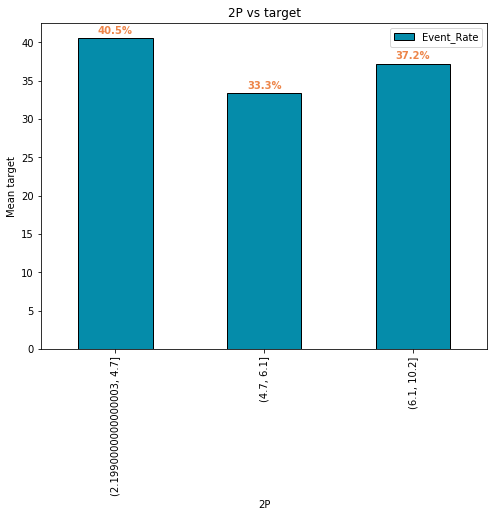

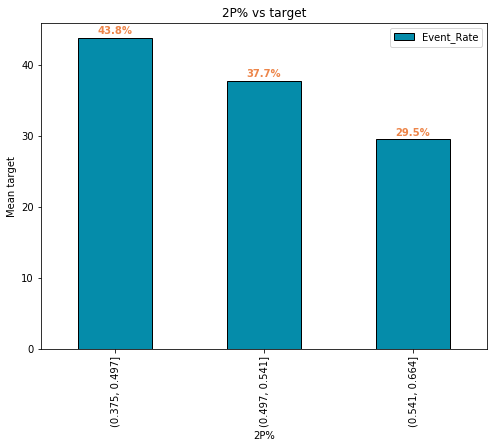

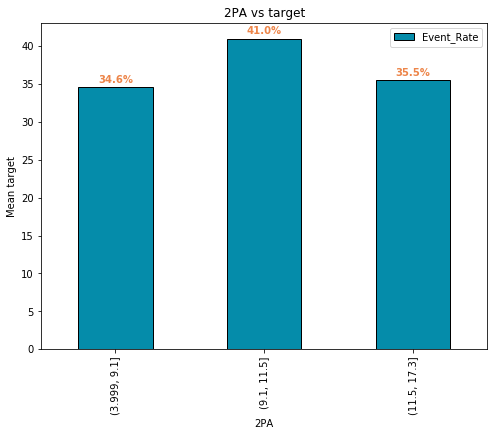

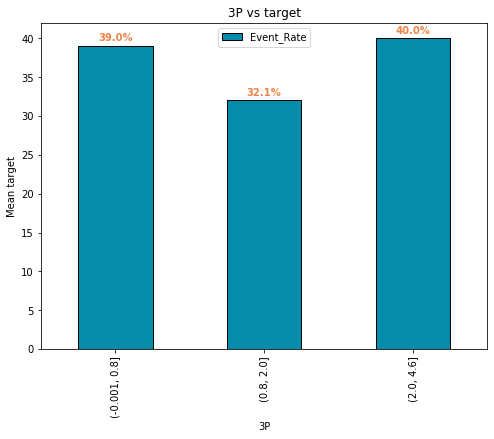

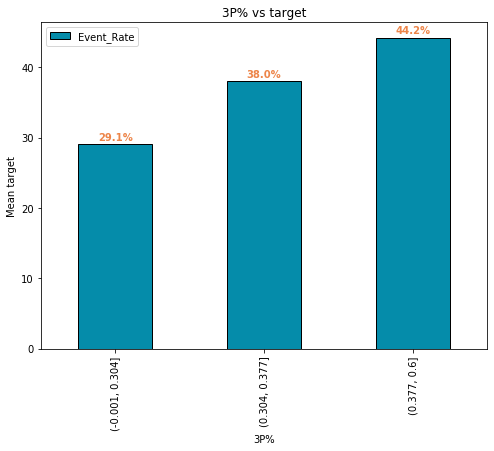

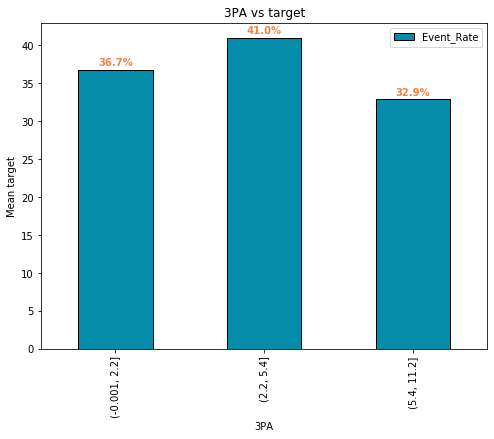

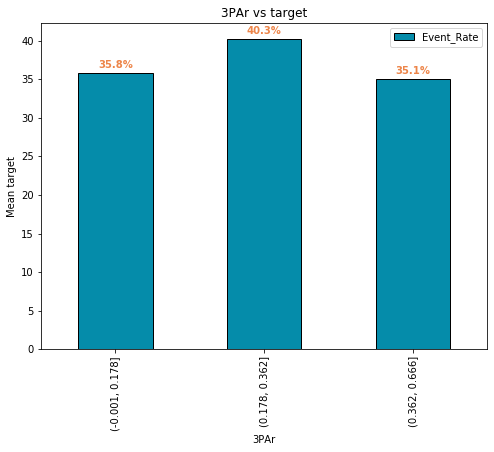

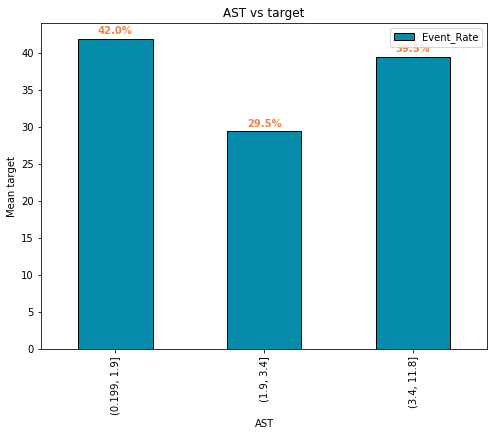

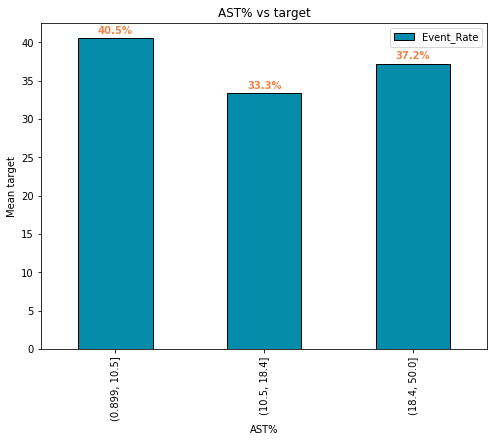

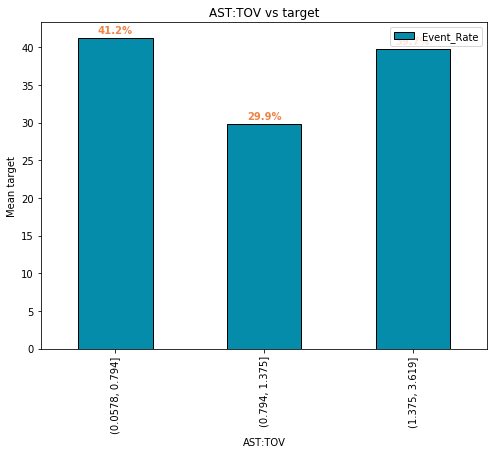

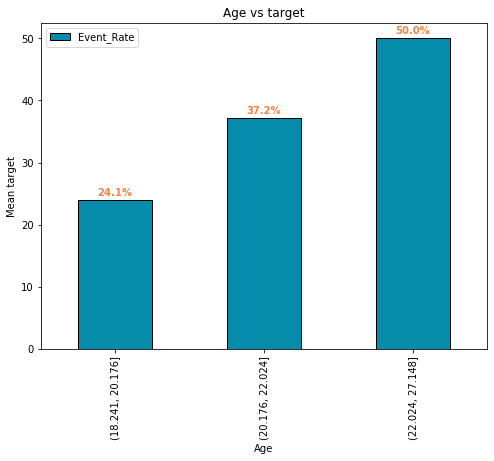

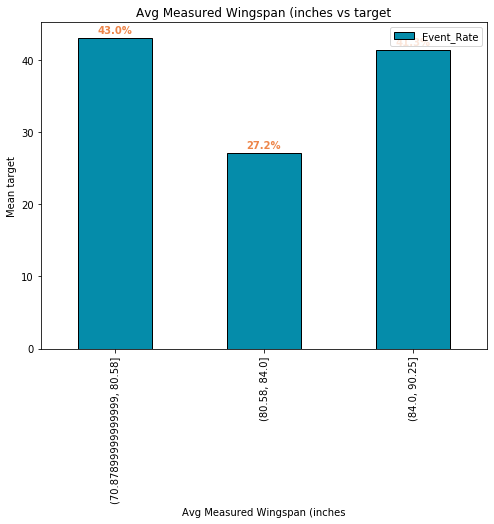

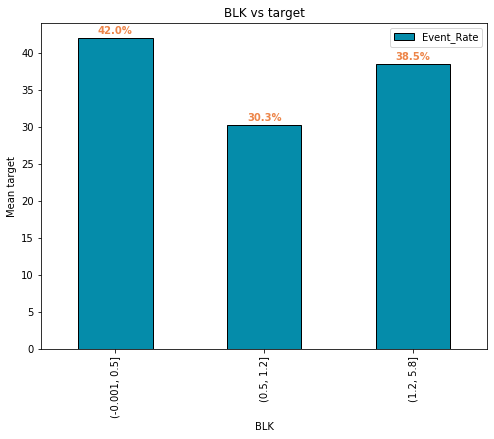

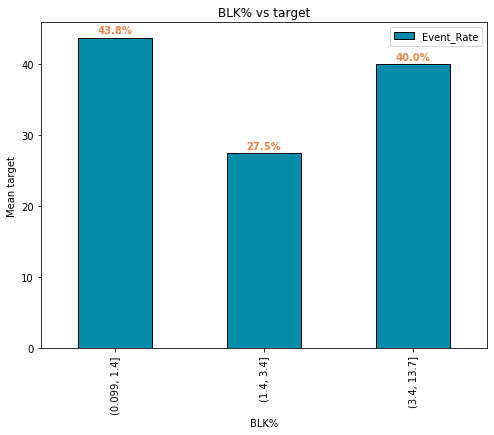

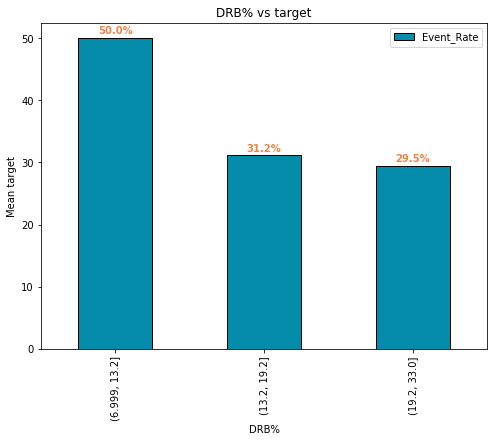

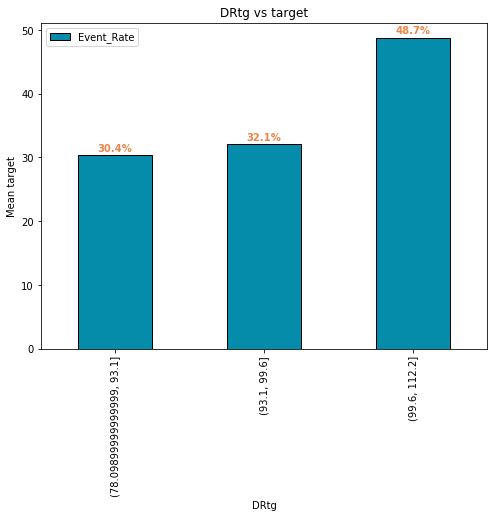

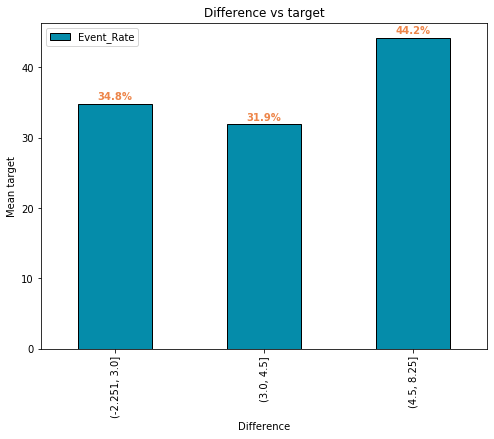

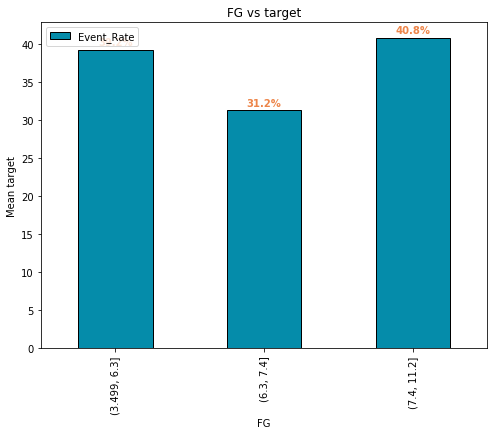

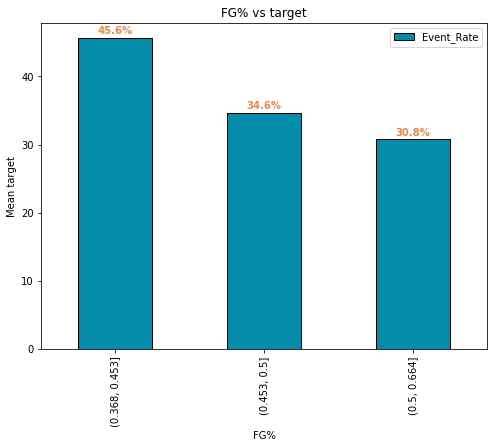

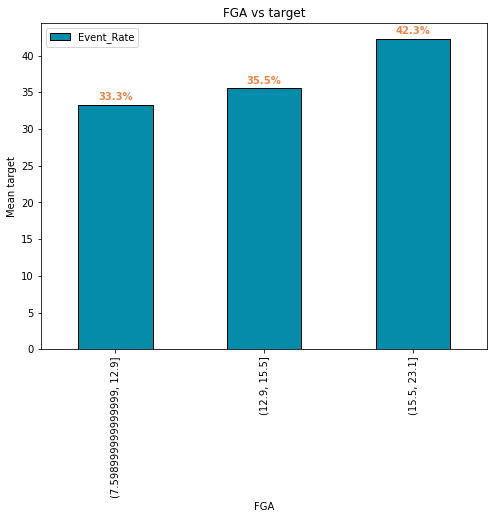

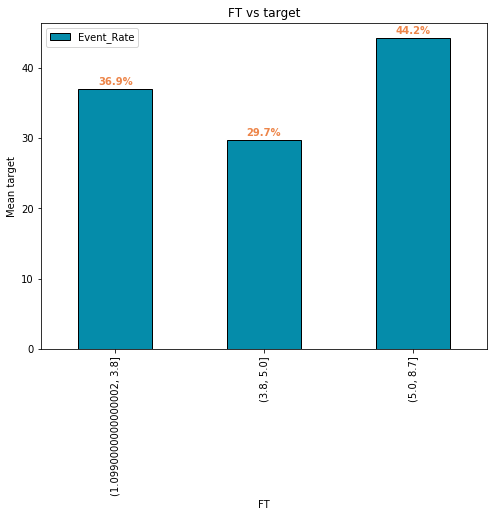

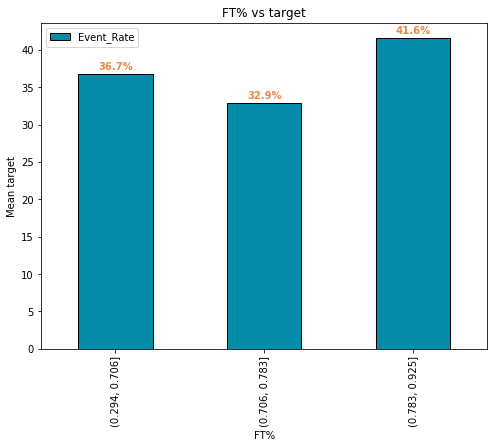

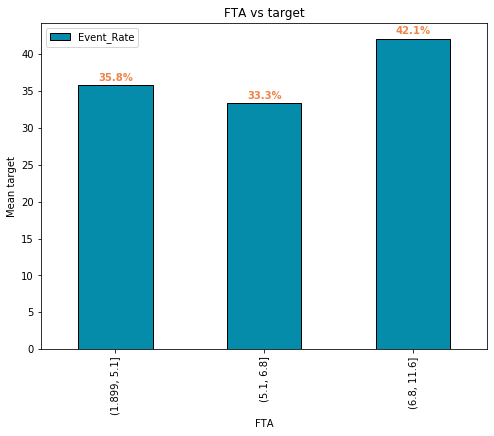

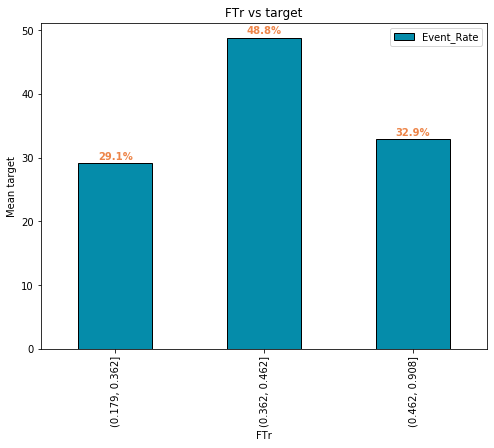

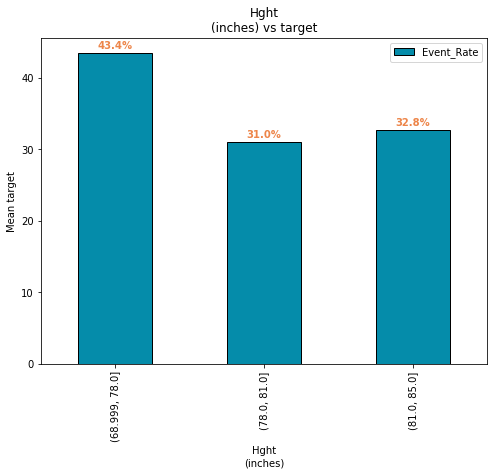

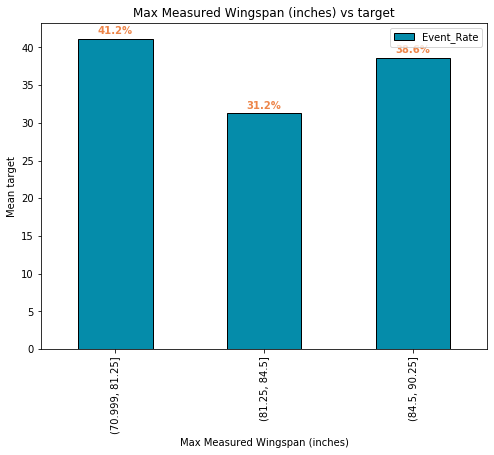

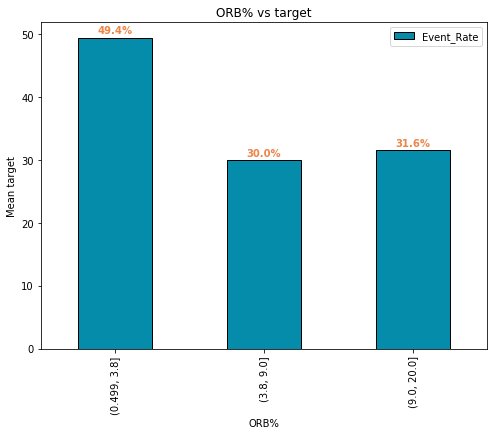

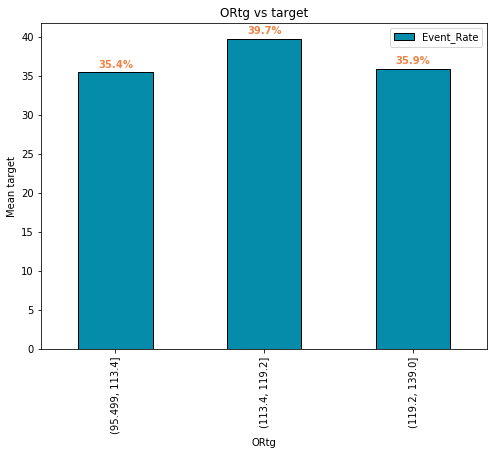

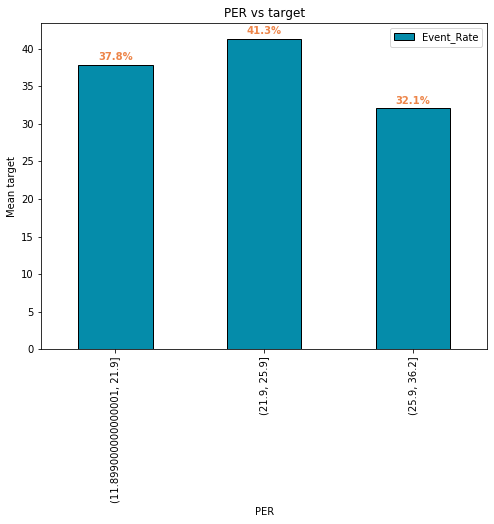

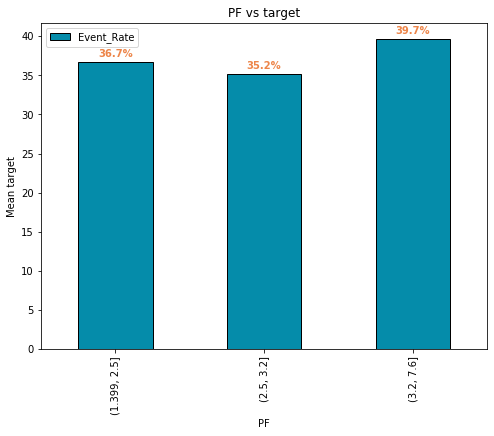

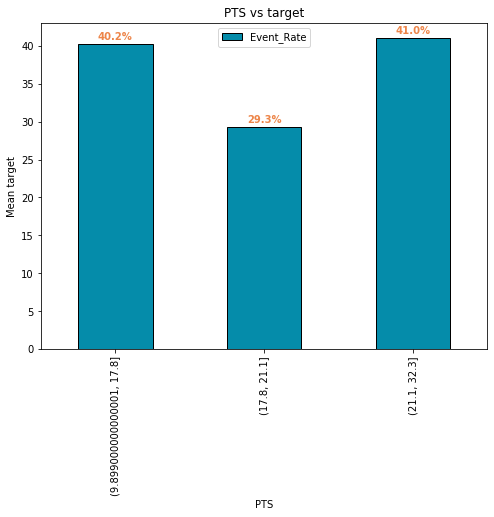

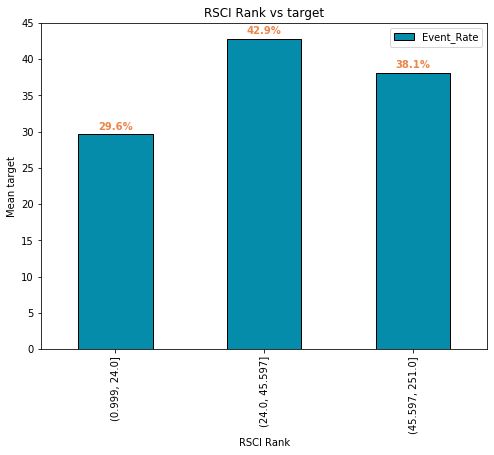

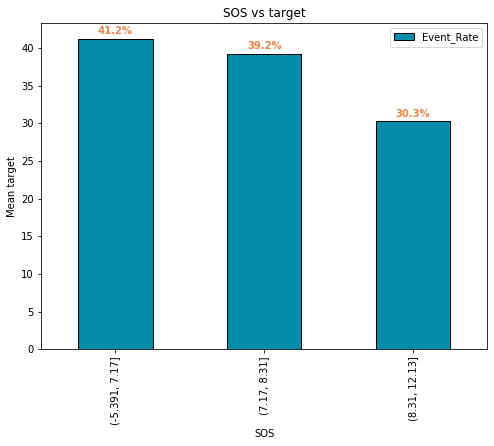

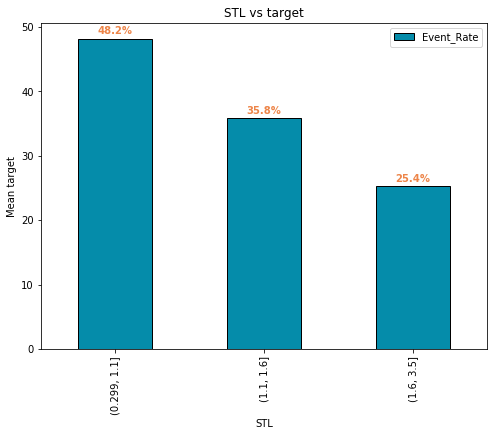

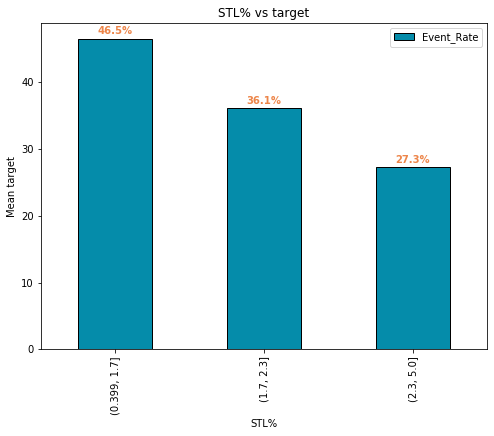

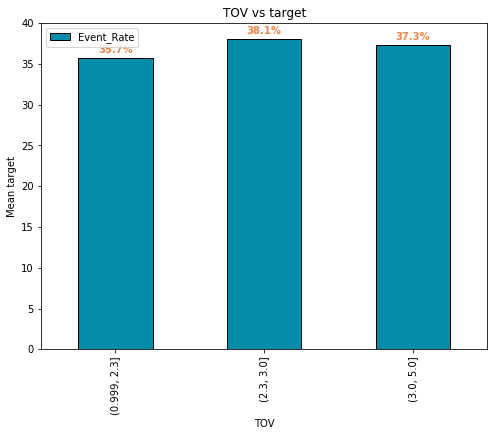

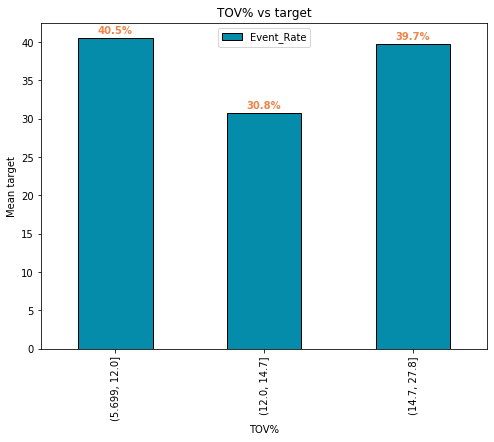

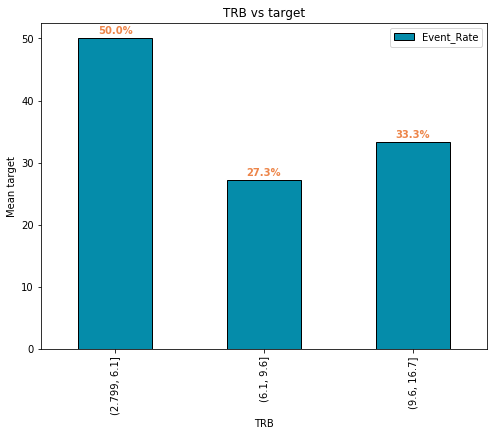

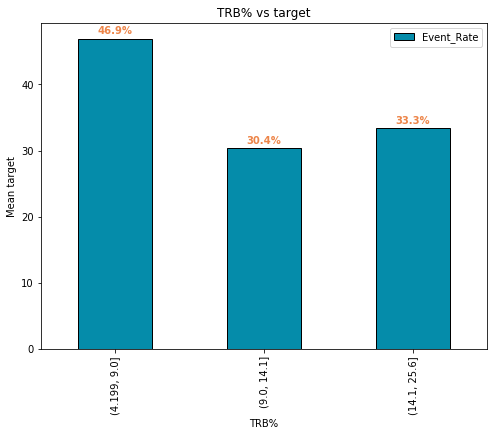

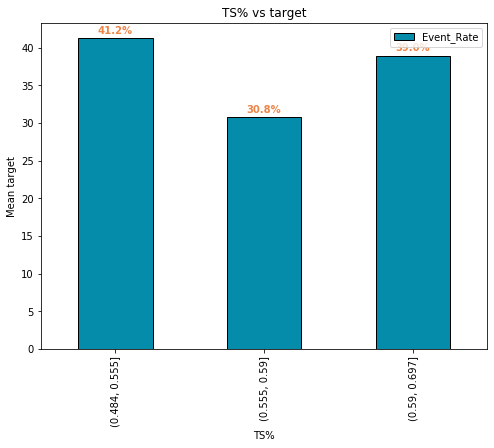

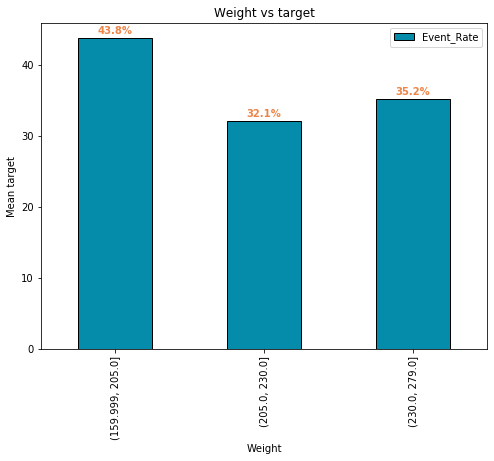

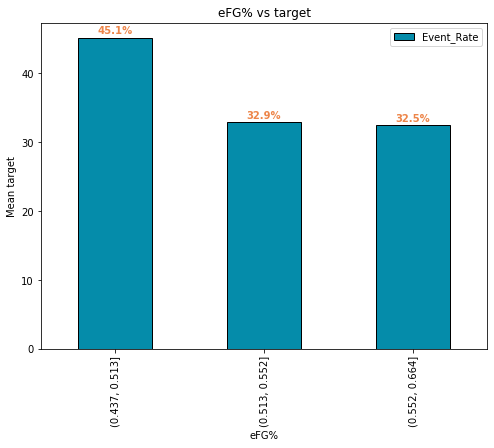

In [24]:
clf.plot(woe_df)

In [25]:
from xverse.ensemble import VotingSelector

clf = VotingSelector()
clf.fit(X, y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

VotingSelector(exclude_features=None, feature_names='all',
               handle_category='woe', minimum_votes=0, no_of_features=21,
               numerical_missing_values='median',
               selection_techniques=['WOE', 'RF', 'RFE', 'ETC', 'CS', 'L_ONE'])

In [26]:
clf.available_techniques

['WOE', 'RF', 'RFE', 'ETC', 'CS', 'L_ONE']

In [27]:
clf.feature_importances_

,Variable_Name,Information_Value,Random_Forest,Recursive_Feature_Elimination,Extra_Trees,Chi_Square,L_One
0,Age,0.213868,0.094772,0.492338,0.034824,1.178903,0.031998
1,TRB,0.170763,0.026406,0.000000,0.036553,0.611717,0.000000
2,STL,0.161579,0.023389,-0.170963,0.023747,0.292514,0.000000
3,DRB%,0.158666,0.020909,-0.146795,0.041191,0.911295,-0.012607
4,ORB%,0.140723,0.035671,0.000000,0.019920,0.274616,0.000000
5,FTr,0.133697,0.044471,-0.237003,0.024374,0.010928,0.000000
6,DRtg,0.124035,0.035015,0.000000,0.029408,0.560687,0.003509
7,STL%,0.120378,0.035599,0.000000,0.031986,0.346931,0.000000
8,Avg Measured Wingspan (inches,0.098820,0.024440,0.000000,0.017442,0.066707,0.000000
9,TRB%,0.096325,0.017879,0.184082,0.025458,0.674687,0.000000


In [28]:
clf.feature_votes_

,Variable_Name,Information_Value,Random_Forest,Recursive_Feature_Elimination,Extra_Trees,Chi_Square,L_One,Votes
0,Age,1,1,1,1,1,1,6
2,STL,1,1,1,1,1,1,6
3,DRB%,1,1,1,1,1,1,6
13,2P%,1,1,1,1,1,1,6
9,TRB%,1,0,1,1,1,1,5
18,AST,1,1,1,1,0,1,5
12,3P%,1,1,1,0,1,1,5
1,TRB,1,1,0,1,1,1,5
10,BLK%,1,1,1,1,0,1,5
7,STL%,1,1,0,1,1,1,5


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [31]:
list(df.columns) 

['Player',
 'Age',
 'SOS',
 'FG',
 'FGA',
 'FG%',
 '2P',
 '2PA',
 '2P%',
 '3P',
 '3PA',
 '3P%',
 'FT',
 'FTA',
 'FT%',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'ORtg',
 'DRtg',
 'PER',
 'TS%',
 'eFG%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'AST:TOV',
 'Hght\n(inches)',
 'Weight',
 'RSCI Rank',
 'Max Measured Wingspan (inches)',
 'Avg Measured Wingspan (inches',
 'Difference',
 'Bust']

In [32]:
import seaborn as sns

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


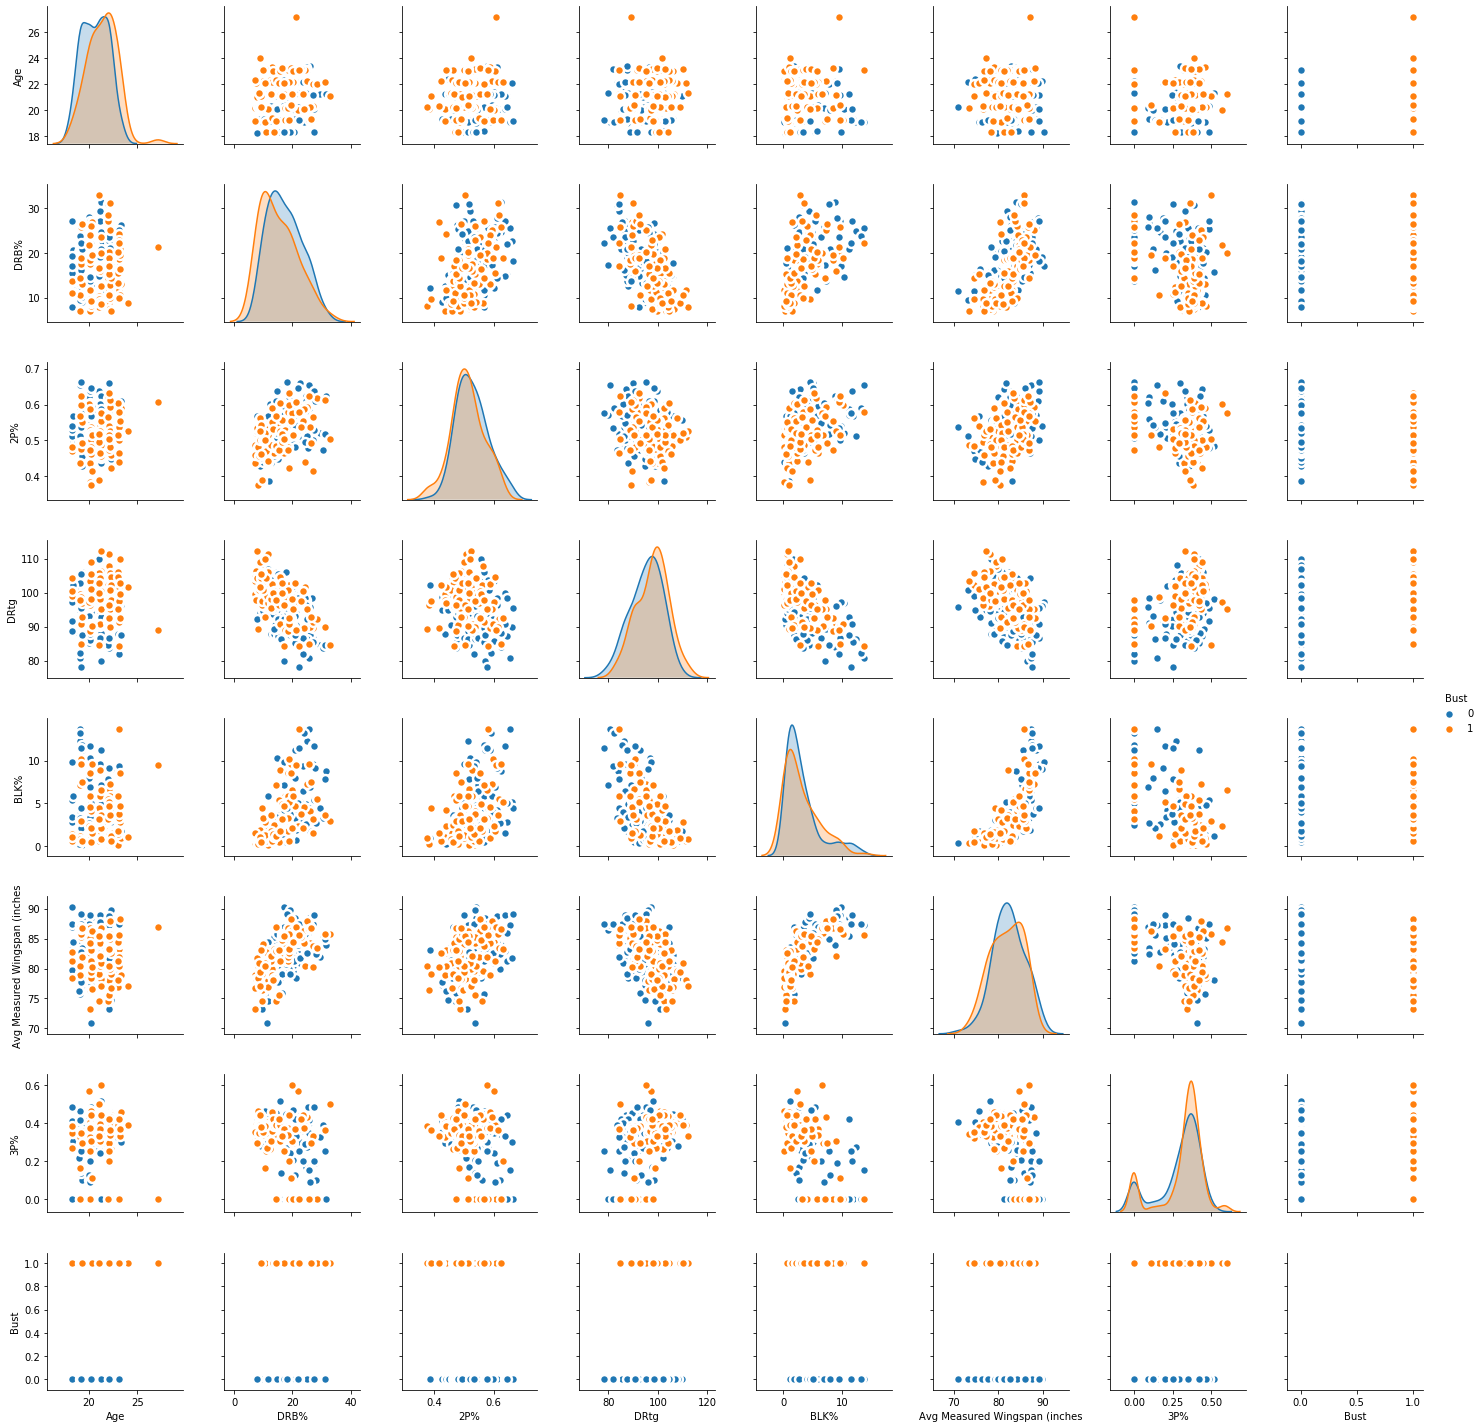

In [33]:
sns.pairplot(df[['Age','DRB%','2P%','DRtg','BLK%','Avg Measured Wingspan (inches', '3P%',
                 'Bust']], hue='Bust',kind="scatter",plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))

/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/base.py:246: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


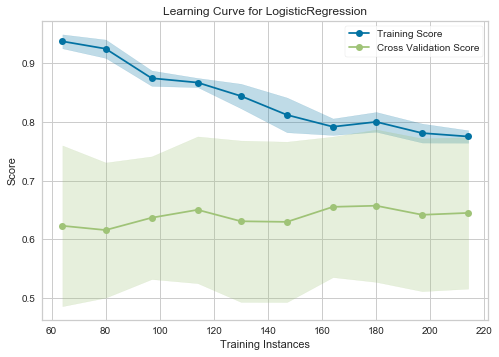

In [34]:
import numpy as np

from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import LearningCurve

# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer
model = LogisticRegression(solver='liblinear', random_state=2)
visualizer = LearningCurve(
    model, cv=cv, scoring='roc_auc', train_sizes=sizes, n_jobs=4
)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/base.py:246: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


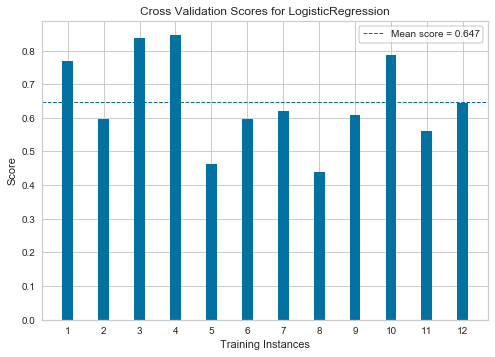

In [35]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores

# Create a cross-validation strategy
cv = StratifiedKFold(n_splits=12, random_state=42)

# Instantiate the classification model and visualizer
model = LogisticRegression(solver='liblinear', random_state=2)
visualizer = CVScores(model, cv=cv, scoring='roc_auc')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


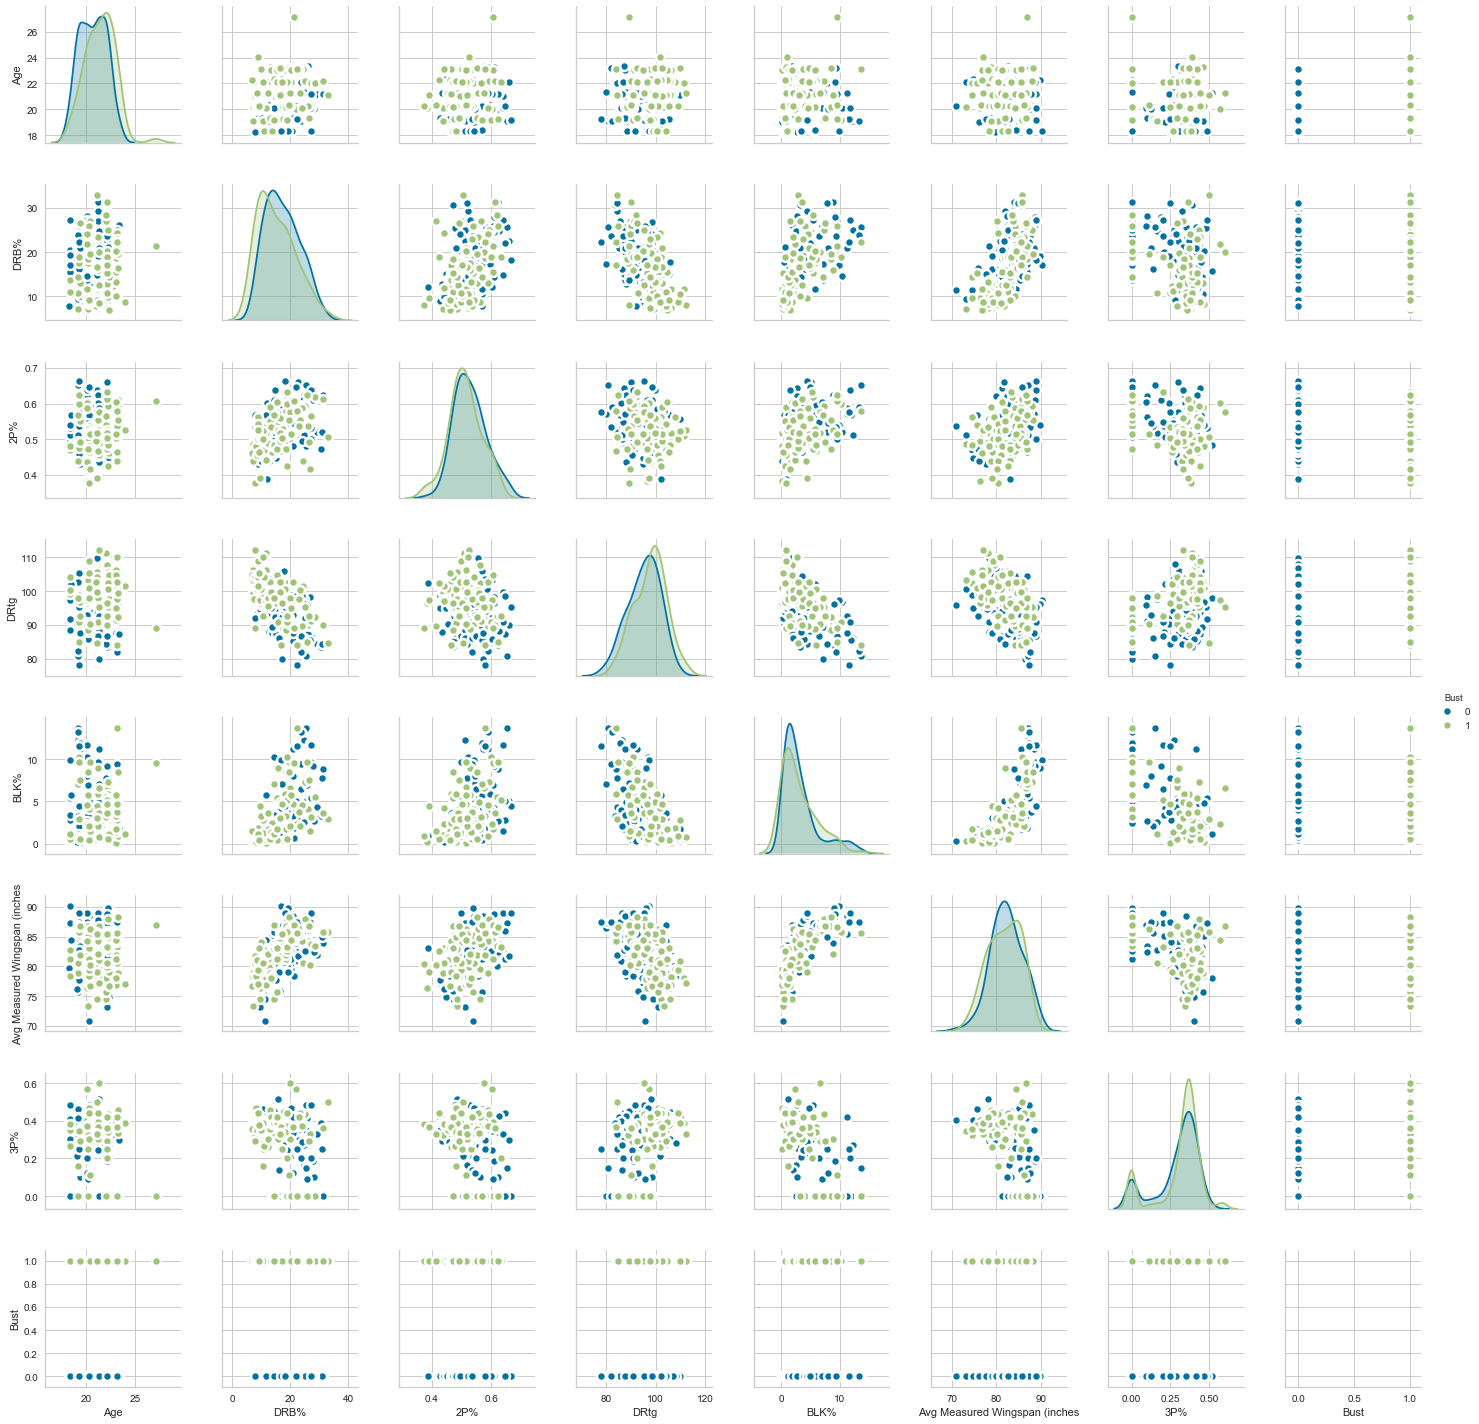

In [36]:
sns.pairplot(df[['Age','DRB%','2P%','DRtg','BLK%','Avg Measured Wingspan (inches', '3P%',
                 'Bust']], hue='Bust',kind="scatter",plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))

In [37]:
X = df.drop(['SOS','FG','FG%','FGA','2P','2PA','3P','FT','FT%','FTA','TRB', 'Player', '3PA','PTS','PER',
 'BLK','TOV','PF','ORtg','FTr','TS%','eFG%','3PAr','Bust', 'TRB%','ORB%','STL',
 'AST','STL%','AST%','TOV%','AST:TOV','Hght\n(inches)', 'Weight','RSCI Rank', 'Max Measured Wingspan (inches)',
 'Difference'], axis=1)
y = df['Bust']

In [38]:
X

,Age,2P%,3P%,DRtg,DRB%,BLK%,Avg Measured Wingspan (inches
0,19.096,0.569,0.462,92.7,10.6,1.8,75.67
1,19.208,0.461,0.377,101.5,10.2,0.6,78.38
2,21.051,0.471,0.330,98.9,11.5,0.5,74.50
3,22.123,0.491,0.396,100.0,8.3,0.1,76.75
4,22.338,0.501,0.350,96.0,10.1,0.2,77.88
...,...,...,...,...,...,...,...
230,19.197,0.664,0.000,95.4,18.2,4.5,89.06
231,20.257,0.646,0.000,98.5,22.1,5.0,85.88
232,19.239,0.623,0.000,84.9,25.8,9.6,86.63
233,19.138,0.568,0.000,97.9,14.5,7.1,86.89


/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/base.py:246: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


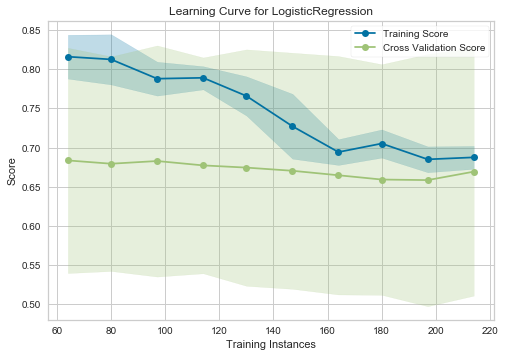

In [39]:
import numpy as np

from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import LearningCurve

# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer
model = LogisticRegression(solver='liblinear', random_state=2)
visualizer = LearningCurve(
    model, cv=cv, scoring='roc_auc', train_sizes=sizes, n_jobs=4
)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/base.py:246: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


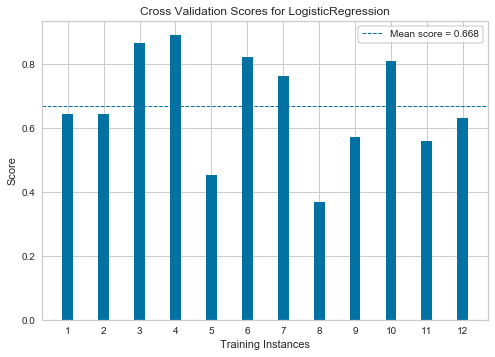

In [40]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores

# Create a cross-validation strategy
cv = StratifiedKFold(n_splits=12, random_state=42)

# Instantiate the classification model and visualizer
model = LogisticRegression(solver='liblinear', random_state=2)
visualizer = CVScores(model, cv=cv, scoring='roc_auc')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [41]:
X

,Age,2P%,3P%,DRtg,DRB%,BLK%,Avg Measured Wingspan (inches
0,19.096,0.569,0.462,92.7,10.6,1.8,75.67
1,19.208,0.461,0.377,101.5,10.2,0.6,78.38
2,21.051,0.471,0.330,98.9,11.5,0.5,74.50
3,22.123,0.491,0.396,100.0,8.3,0.1,76.75
4,22.338,0.501,0.350,96.0,10.1,0.2,77.88
...,...,...,...,...,...,...,...
230,19.197,0.664,0.000,95.4,18.2,4.5,89.06
231,20.257,0.646,0.000,98.5,22.1,5.0,85.88
232,19.239,0.623,0.000,84.9,25.8,9.6,86.63
233,19.138,0.568,0.000,97.9,14.5,7.1,86.89


In [42]:
features = ['Age','2P%', '3P%', 'DRTg','DRB%','BLK%', 'Avg Measured Wingspan (inches)']

In [43]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Train accuracy: 0.7045454545454546
Test accuracy: 0.711864406779661
ROC AUC: 0.6052631578947367


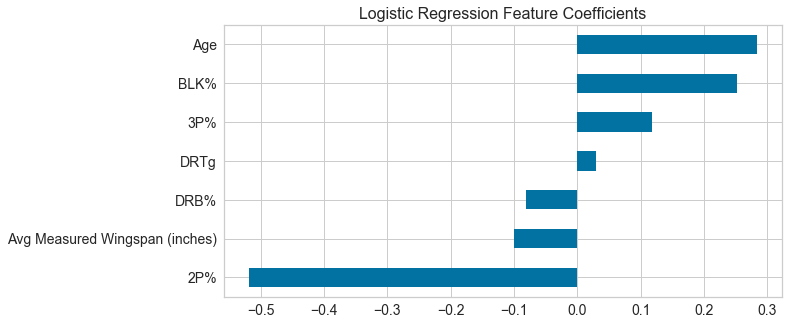

In [44]:
logreg = LogisticRegression(solver='liblinear', random_state=2).fit(x_train, y_train)
y_scores_logreg = logreg.predict_proba(x_test)[:,1]
y_pred_logreg = logreg.predict(x_test)

print("Train accuracy:",logreg.score(x_train, y_train))
print("Test accuracy:", logreg.score(x_test, y_test))
print("ROC AUC:", roc_auc_score(y_test, y_scores_logreg))

ax = pd.DataFrame(
    logreg.coef_.transpose(),
    index=features,
    columns=['coefficients']
).sort_values('coefficients').plot(
    kind='barh', legend=False, title='Logistic Regression Feature Coefficients', figsize=(10,5), fontsize=14
)

ax.title.set_size(16)

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [46]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [47]:
xg_cl = xgb.XGBClassifier()

In [48]:
params = {"max_depth": [10,30,50],
              "min_child_weight" : [1,3,6],
              "n_estimators": [200],
              "learning_rate": [0.05, 0.1,0.16],}

In [49]:
grid_search = GridSearchCV(xg_cl, params, cv = 3, verbose=10, n_jobs=-1)

In [50]:
grid_search.fit(X_train, Y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1957s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1262s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  66 out of  81 | elapsed:    3.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  75 out of  81 | elapsed:    3.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    3.0s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.16],
                         'max_depth': [10, 30, 50],
                         'min_child_weight': [1, 3, 6], 

In [51]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [52]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [53]:
xg = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1).fit(X_train, Y_train)
y_scores_xg = xg.predict_proba(X_test)[:,1]

print("Train Accuracy:",xg.score(X_train, Y_train))
print("Test Accuracy:", xg.score(X_test, Y_test))
print("ROC AUC:", roc_auc_score(Y_test, y_scores_xg))

Train Accuracy: 1.0
Test Accuracy: 0.6271186440677966
ROC AUC: 0.5552631578947368


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


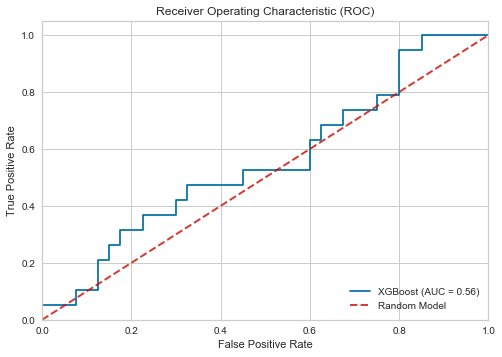

In [54]:
xg_roc_auc = roc_auc_score(Y_test, y_scores_xg)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_scores_xg)
plt.plot(fpr, tpr, label='XGBoost (AUC = %0.2f)' % xg_roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Random Model', alpha=.8)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [55]:
import shap

In [56]:
explainer = shap.TreeExplainer(xg)

In [57]:
shap_values = explainer.shap_values(X_train)

In [58]:
shap.initjs()

/opt/anaconda3/lib/python3.7/site-packages/shap/plots/summary.py:464: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


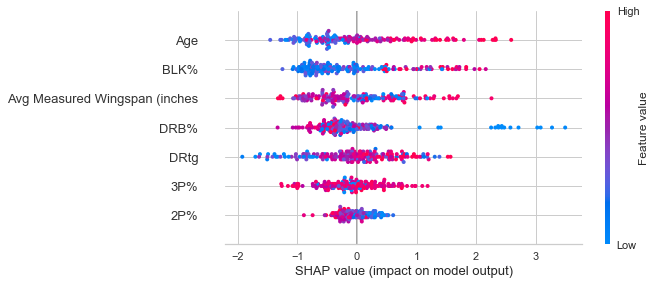

In [59]:
shap.summary_plot(shap_values, X_train)

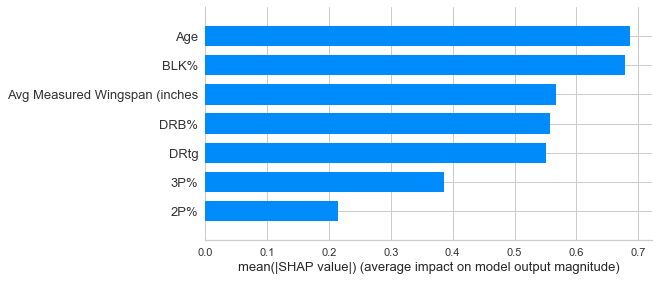

In [60]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [61]:
shap_interaction_values = shap.TreeExplainer(xg).shap_interaction_values(X)

/opt/anaconda3/lib/python3.7/site-packages/shap/plots/summary.py:181: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


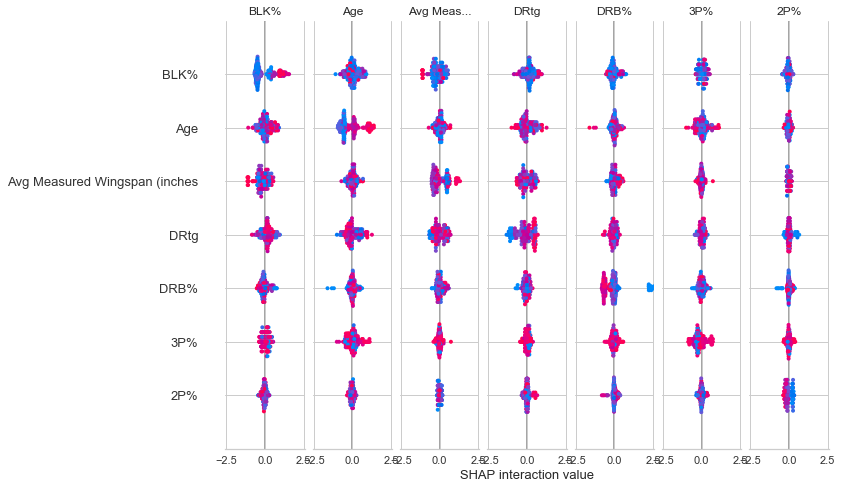

In [62]:
shap.summary_plot(shap_interaction_values, X)

/opt/anaconda3/lib/python3.7/site-packages/shap/plots/dependence.py:291: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


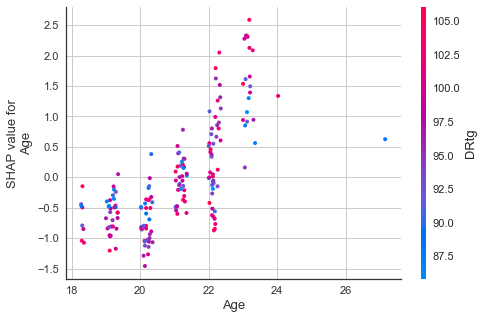

In [63]:
shap.dependence_plot('Age', shap_values, X_train)

/opt/anaconda3/lib/python3.7/site-packages/shap/plots/dependence.py:291: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


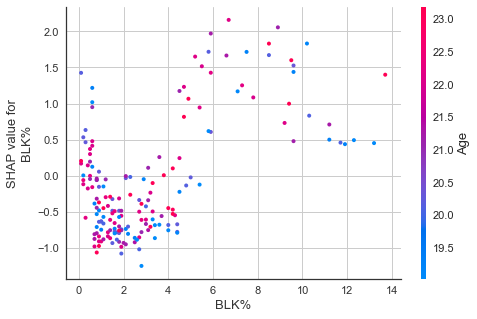

In [64]:
shap.dependence_plot("BLK%", shap_values, X_train)

/opt/anaconda3/lib/python3.7/site-packages/shap/plots/dependence.py:291: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


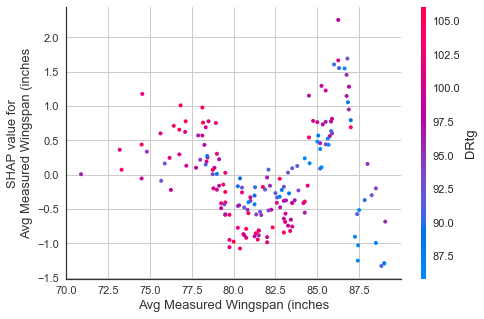

In [65]:
shap.dependence_plot("Avg Measured Wingspan (inches", shap_values, X_train)

/opt/anaconda3/lib/python3.7/site-packages/shap/plots/dependence.py:291: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


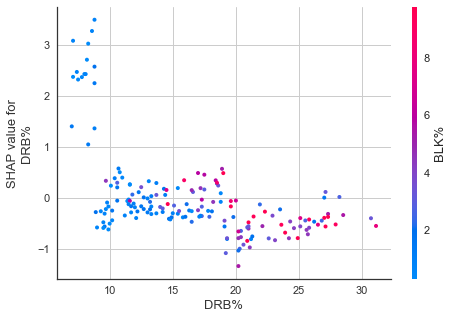

In [66]:
shap.dependence_plot("DRB%", shap_values, X_train)

/opt/anaconda3/lib/python3.7/site-packages/shap/plots/dependence.py:291: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


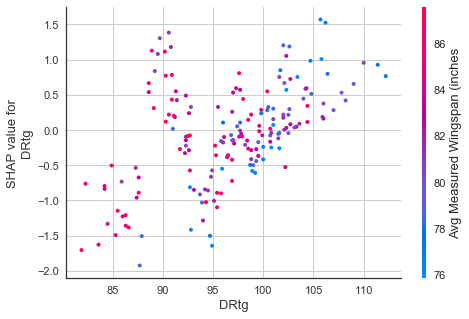

In [67]:
shap.dependence_plot("DRtg", shap_values, X_train)

/opt/anaconda3/lib/python3.7/site-packages/shap/plots/dependence.py:291: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


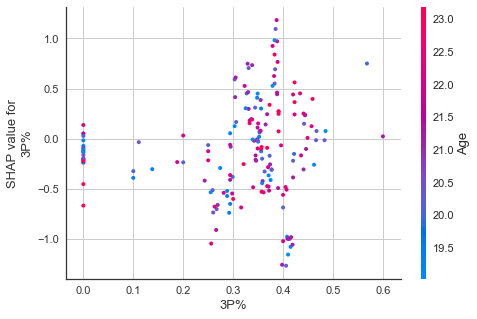

In [68]:
shap.dependence_plot("3P%", shap_values, X_train)

/opt/anaconda3/lib/python3.7/site-packages/shap/plots/dependence.py:291: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


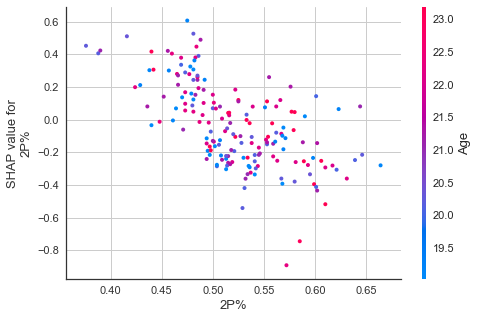

In [69]:
shap.dependence_plot("2P%", shap_values, X_train)

In [70]:
dataset = pd.read_excel('2017 Stats Only Bust.xlsx')

In [71]:
players = dataset['Player']
dataset = dataset.drop('Player', axis=1)
predictions = xg.predict_proba(dataset)[:,1]
print(predictions)

[0.0107911  0.02352712 0.1388415  0.24121396 0.89366955 0.8734353
 0.98117906 0.7690429  0.8641652  0.14031912 0.04376154 0.59710824
 0.2551232  0.12625407 0.01098205 0.04399816 0.33300778 0.4357656
 0.1501393  0.6185696  0.07921484 0.74169266 0.4146073  0.02136615
 0.08005829 0.04969443 0.67683595 0.5922792  0.09755668 0.6912134
 0.11027535 0.06624958 0.23874024 0.24774471 0.65459824 0.08433209
 0.16012791 0.25618243 0.02888465 0.11149544 0.20273386 0.03302035
 0.6563302  0.1868145  0.024939   0.3680831  0.33961177 0.08747838
 0.09304491 0.21626802]


In [72]:
output = {'Player':players, 'Bust': predictions}
output = pd.DataFrame(output, columns = ['Player', 'Bust'])
print(output)

                 Player      Bust
0        Markelle Fultz  0.010791
1            Lonzo Ball  0.023527
2          De'Aaron Fox  0.138841
3          Dennis Smith  0.241214
4         Derrick White  0.893670
5         Frank Jackson  0.873435
6           Frank Mason  0.981179
7           Jawun Evans  0.769043
8          Monte Morris  0.864165
9         Edmond Sumner  0.140319
10  Nigel Williams-Goss  0.043762
11           Malik Monk  0.597108
12         Luke Kennard  0.255123
13     Donovan Mitchell  0.126254
14            Josh Hart  0.010982
15           Davon Reed  0.043998
16        Wesley Iwundu  0.333008
17         Dwayne Bacon  0.435766
18         Tyler Dorsey  0.150139
19       Damyean Dotson  0.618570
20       Sterling Brown  0.079215
21         Kadeem Allen  0.741693
22          Jabari Bird  0.414607
23         Jayson Tatum  0.021366
24         Josh Jackson  0.080058
25       Justin Jackson  0.049694
26           OG Anunoby  0.676836
27         Semi Ojeleye  0.592279
28        Dill

In [73]:
output.to_excel("2017 Bust Prob Stats Only.xlsx")

In [74]:
dataset = pd.read_excel('2018 Stats Only Bust.xlsx')

In [75]:
players = dataset['Player']
dataset = dataset.drop('Player', axis=1)
predictions = xg.predict_proba(dataset)[:,1]
print(predictions)

[0.10189858 0.42055967 0.12164136 0.09402937 0.53881377 0.35035062
 0.19728306 0.7212949  0.36741683 0.18229726 0.04594602 0.01099296
 0.09513081 0.1306115  0.6620795  0.02932669 0.15220663 0.13210048
 0.0205582  0.09453501 0.03046088 0.20977463 0.15350078 0.4118334
 0.98240477 0.17107615 0.95797044 0.34287965 0.01998712 0.6661092
 0.8551033  0.14928202 0.3933614  0.03343913 0.05315653 0.9790388
 0.19121923 0.95539576 0.54857016 0.10306286]


In [76]:
output = {'Player':players, 'Bust': predictions}
output = pd.DataFrame(output, columns = ['Player', 'Bust'])
print(output)

                     Player      Bust
0             DeAndre Ayton  0.101899
1             Marvin Bagley  0.420560
2         Jaren Jackson Jr.  0.121641
3             Mohamed Bamba  0.094029
4            Michael Porter  0.538814
5            Wendell Carter  0.350351
6                Trae Young  0.197283
7             Collin Sexton  0.721295
8             Mikal Bridges  0.367417
9                Kevin Knox  0.182297
10  Shai Gilgeous-Alexander  0.045946
11            Miles Bridges  0.010993
12          Robert Williams  0.095131
13             Zhaire Smith  0.130611
14            Landry Shamet  0.662080
15             Khyri Thomas  0.029327
16           Gary Trent Jr.  0.152207
17            Lonnie Walker  0.132100
18            Kevin Huerter  0.020558
19       Chandler Hutchison  0.094535
20               Troy Brown  0.030461
21         Donte DiVincenzo  0.209775
22           Omari Spellman  0.153501
23            Jalen Brunson  0.411833
24            Aaron Holiday  0.982405
25          

In [77]:
output.to_excel("2018 Bust Prob Stats Only.xlsx")